In [1]:
using PyPlot
using LaTeXStrings
using Printf
using LinearAlgebra
using Statistics

In [2]:
function move_axes_to_origin(ax, axes_coords::Union{Missing, Array{Float64,2}}=missing)
    ax.xaxis.tick_bottom()
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("bottom")
    ax.spines["right"].set_position("zero")
    ax.spines["right"].set_linewidth(3.5)
    ax.spines["left"].set_color("none")
    ax.yaxis.tick_right()
    ax.spines["top"].set_position("zero")
    ax.spines["top"].set_linewidth(3.5)
    ax.spines["bottom"].set_color("none")
    ax.set_axisbelow(false)
    ax.set_xticks([])
    ax.set_yticks([])
    if typeof(axes_coords) != Missing
        @assert length(axes_coords) == 4 && size(axes_coords) == (2,2)
        ax.xaxis.set_label_coords(axes_coords[1,1], axes_coords[1,2])
        ax.yaxis.set_label_coords(axes_coords[2,1], axes_coords[2,2])
    end
end

move_axes_to_origin (generic function with 2 methods)

In [3]:
function get_cm(vmax::Float64=2*π, vmin::Float64=0.0)
    cnorm = PyPlot.matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    m = plt.cm.ScalarMappable(norm=cnorm, cmap=plt.cm.hsv)
    m.set_array([])
    return m
end

get_cm (generic function with 3 methods)

In [4]:
function down_arrow(fig::Any, y_start::Float64=6.0, y_length::Float64=-0.8)
    ax = fig.add_subplot(111)
    ax.set_xlim([-5,5])
    ax.set_ylim([0,11])
    plt.arrow(0.0, y_start, 0.0, y_length, color="k", width=0.01, head_width=0.1, zorder=9999)
    #plt.text(5.25, 2.6, "\$\\mathbf{H}^{-1}\$", fontsize=20)
    ax.axis("off")
end

down_arrow (generic function with 3 methods)

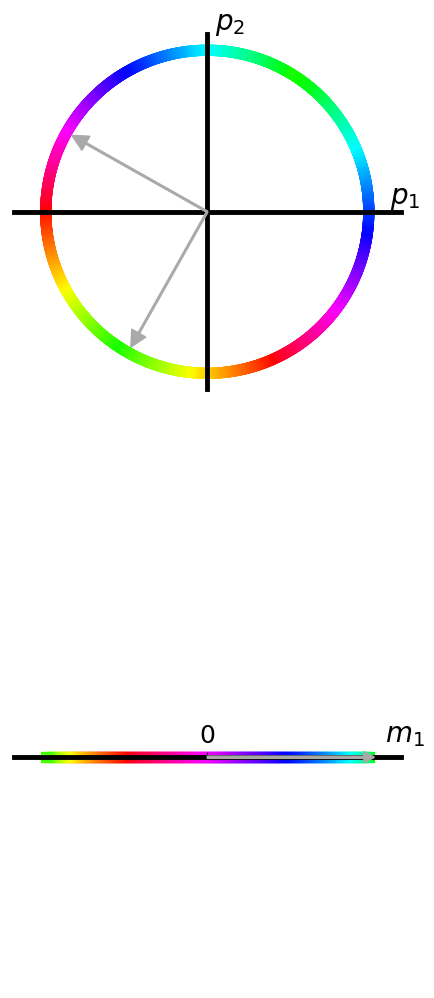

In [5]:
function plot_1d_sensor(H::Array{Float64, 2}, max_p::Float64)
    F = svd(H, full=true)
    theta = atan(F.Vt[2,1]/F.Vt[1,1])
    m = get_cm(1*π)
    θ = range(theta, stop=2*π+theta, length=500)
    p = max_p .* transpose(hcat(cos.(θ), sin.(θ)))
    
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5, 10), 
                            gridspec_kw = Dict("top" => 1.0, "bottom" => 0.0))

    axs[1].set_aspect("equal")
    axes_coords = [1.01 0.58; 0.56 0.99]
    move_axes_to_origin(axs[1], axes_coords)
    axs[1].set_xlabel("\$p_1\$", fontsize=20)
    axs[1].set_ylabel("\$p_2\$", rotation=0, fontsize=20)
    
    for i = 1:length(θ)-1
        if i > length(θ)/2
            axs[1].plot([p[1,i], p[1,i+1]], [p[2,i], p[2,i+1]], lw=8, c=m.to_rgba((2*(theta+π)-mean(θ[i:i+1]))%π))
        else
            axs[1].plot([p[1,i], p[1,i+1]], [p[2,i], p[2,i+1]], lw=8, c=m.to_rgba(mean(θ[i:i+1])%π))
        end
    end
    svec_plot = F.Vt .- 0.1 .* F.Vt ./ norm.(F.Vt)
    axs[1].arrow(0.0, 0.0, svec_plot[1,1], svec_plot[2,1], color="#a9a9a9", 
            head_length = 0.1, width=0.01, head_width=0.1, zorder=99)
    axs[1].arrow(0.0, 0.0, svec_plot[1,2], svec_plot[2,2], color="#a9a9a9", 
            head_length = 0.1, width=0.01, head_width=0.1, zorder=99)
    axs[1].set_xlim([-1.2, 1.2])
    
    axs[2].xaxis.tick_bottom()
    axs[2].xaxis.set_ticks_position("top")
    axs[2].xaxis.set_label_position("bottom")
    axs[2].spines["left"].set_color("none")
    axs[2].spines["right"].set_color("none")
    axs[2].spines["top"].set_position("zero")
    axs[2].spines["top"].set_linewidth(3.5)    
    axs[2].spines["bottom"].set_color("none")
    axs[2].set_axisbelow(false)
    axs[2].set_xticks([0])
    plt.tick_params(labelsize=18)
    axs[2].set_yticks([])
    axs[2].set_xlabel("\$m_1\$", fontsize=20)
    axs[2].xaxis.set_label_coords(1.01, 0.58)

    θ = range(theta, stop=π+theta, length=500)
    p = max_p .* transpose(hcat(cos.(θ), sin.(θ)))

    n = H * p
 
    for i=1:length(θ)-1
        axs[2].plot([n[i], n[i+1]], zeros(2), lw=8, c=m.to_rgba(θ[i+1]%π))
    end
    
    axs[2].arrow(0.0, 0.0, 0.97*F.S[1], 0.0, color="#a9a9a9",
                 head_length=0.1, width=0.01, head_width=0.05, zorder=99)
        
    axs[2].set_xlim([1.2*minimum(n), 1.2*maximum(n)])
    axs[2].set_ylim([-1, 1])
    #down_arrow(fig, 5.5, -1.5)

    plt.tight_layout()
    plt.savefig("one_sensor.png", format="png", dpi=300, transparent=true)
    plt.show()
end

H = [0.8 1.3]
plot_1d_sensor(H, 1.)

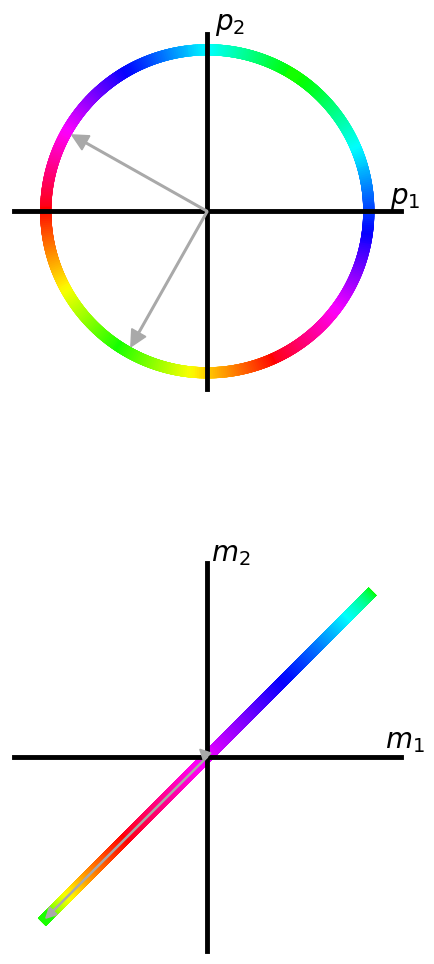

In [6]:
function plot_2d_absurd_sensor(H::Array{Float64, 2}, max_p::Float64, filename::Union{Missing, AbstractString}=missing)
    F = svd(H, full=true)
    theta = atan(F.Vt[2,1]/F.Vt[1,1])
    m = get_cm(1*π)
    θ = range(theta, stop=2*π+theta, length=500)
    p = max_p .* transpose(hcat(cos.(θ), sin.(θ)))
    
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5, 10), 
                            gridspec_kw = Dict("top" => 1.0, "bottom" => 0.0))
    
    axs[1].set_aspect("equal")
    axes_coords = [1.01 0.58; 0.56 0.99]
    move_axes_to_origin(axs[1], axes_coords)
    axs[1].set_xlabel("\$p_1\$", fontsize=20)
    axs[1].set_ylabel("\$p_2\$", rotation=0, fontsize=20)
    
    for i = 1:length(θ)-1
        if i > length(θ)/2
            axs[1].plot([p[1,i], p[1,i+1]], [p[2,i], p[2,i+1]], lw=8, c=m.to_rgba((2*(theta+π)-mean(θ[i:i+1]))%π))
        else
            axs[1].plot([p[1,i], p[1,i+1]], [p[2,i], p[2,i+1]], lw=8, c=m.to_rgba(mean(θ[i:i+1])%π))
        end
    end
    svec_plot = F.Vt .- 0.1 .* F.Vt ./ norm.(F.Vt)
    axs[1].arrow(0.0, 0.0, svec_plot[1,1], svec_plot[2,1], color="#a9a9a9", 
            head_length = 0.1, width=0.01, head_width=0.1, zorder=99)
    axs[1].arrow(0.0, 0.0, svec_plot[1,2], svec_plot[2,2], color="#a9a9a9", 
            head_length = 0.1, width=0.01, head_width=0.1, zorder=99)

    axs[1].set_xlim([-1.2, 1.2])
    
    move_axes_to_origin(axs[2], axes_coords)
    axs[2].set_aspect("equal")
    axs[2].set_xlabel("\$m_1\$", fontsize=20)
    axs[2].set_ylabel("\$m_2\$", rotation=0, fontsize=20)

    θ = range(theta, stop=π+theta, length=500)
    p = max_p .* transpose(hcat(cos.(θ), sin.(θ)))

    n = H * p
 
    for i=1:length(θ)-1
        axs[2].plot([n[1,i], n[1,i+1]], [n[2,i], n[2,i+1]], lw=8, c=m.to_rgba(mean(θ[i:i+1])%π))
    end
    svec_plot1 = F.S[1]*F.U[:,1] - 0.1 * F.S[1]*F.U[:,1] / F.S[1]
    svec_plot2 = 1e-9*F.U[:,2] - 0.1 * 1e-9*F.U[:,2]
    axs[2].arrow(0.0, 0.0, svec_plot1[1], svec_plot1[2], color="#a9a9a9", 
            head_length = 0.1, width=0.01, head_width=0.1, zorder=99)
    axs[2].arrow(0.0, 0.0, svec_plot2[1], svec_plot2[2], color="#a9a9a9", 
            head_length = 0.1, width=0.01, head_width=0.1, zorder=99)
        
    axs[2].set_xlim([1.2*minimum(n), 1.2*maximum(n)])
    axs[2].set_ylim(axs[2].get_xlim())

    #down_arrow(fig, 6.0, -.7)
    plt.tight_layout()
    if typeof(filename) != Missing
        plt.savefig(split(filename, ".")[1] * ".png", format="png", dpi=300, transparent=true)
    end
    plt.show()
end

H = [0.8 1.3; 0.8 1.3]
plot_2d_absurd_sensor(H, 1., "two_sensor_absurd")

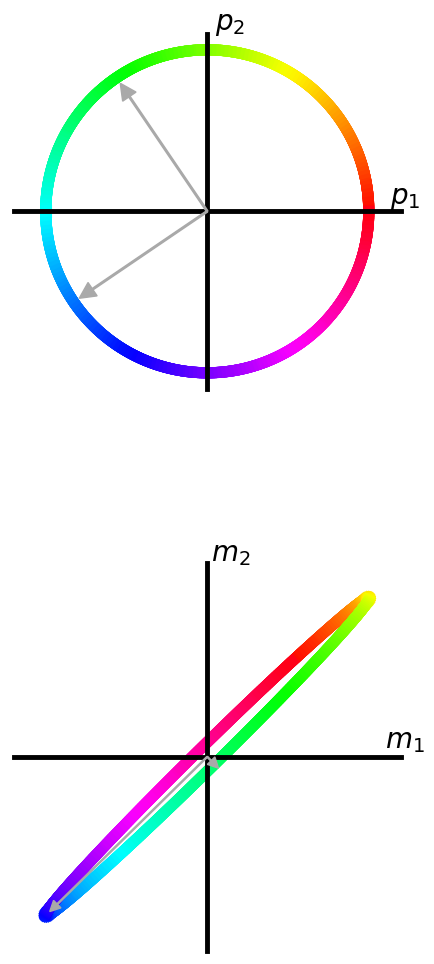

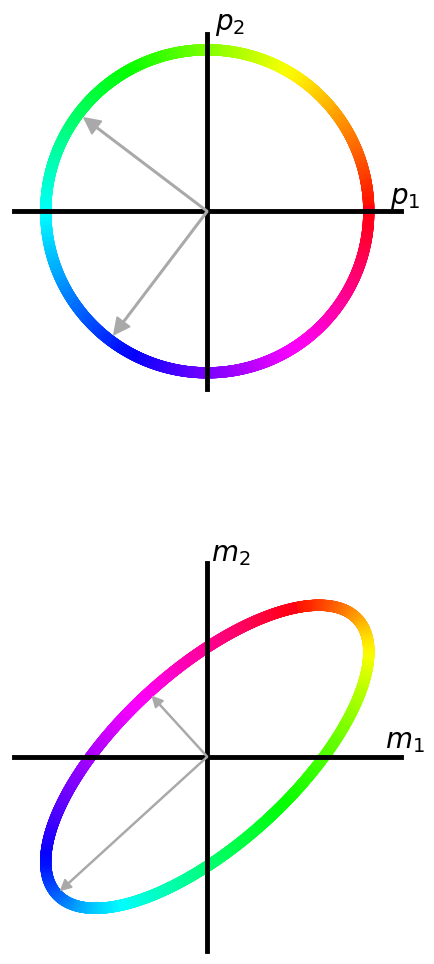

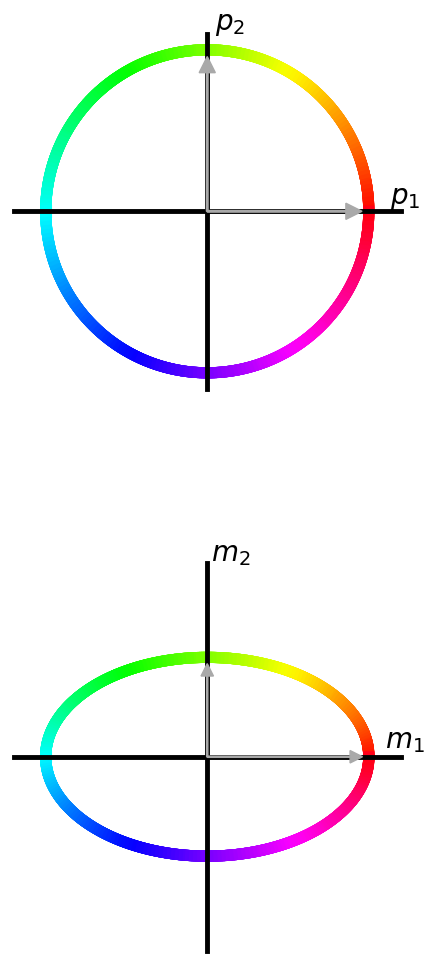

In [10]:
function plot_2d_sensor(H::Array{Float64, 2}, max_p::Float64, filename::Union{Missing, AbstractString}=missing)
    m = get_cm(2*π)
    θ = range(0.0, stop=2*π, length=500)
    p = max_p .* transpose(hcat(cos.(θ), sin.(θ)))
    
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5, 10), 
                            gridspec_kw = Dict("top" => 1.0, "bottom" => 0.0))
    
    axs[1].set_aspect("equal")
    axes_coords = [1.01 0.58; 0.56 0.99]
    move_axes_to_origin(axs[1], axes_coords)
    axs[1].set_xlabel("\$p_1\$", fontsize=20)
    axs[1].set_ylabel("\$p_2\$", rotation=0, fontsize=20)
    
    for i = 1:length(θ)-1
        axs[1].plot([p[1,i], p[1,i+1]], [p[2,i], p[2,i+1]], lw=8, c=m.to_rgba(mean(θ[i:i+1])))
    end

    axs[1].set_xlim([-1.2, 1.2])
    F = svd(H, full=true)
    svec_plot1 = (F.Vt - 0.2 * F.Vt ./ norm(F.Vt))[:,1]
    svec_plot2 = (F.Vt - 0.2 * F.Vt ./ norm(F.Vt))[:,2]

    axs[1].arrow(0.0, 0.0, svec_plot1[1], svec_plot1[2], color="#a9a9a9", 
            head_length = 0.1, width=0.01, head_width=0.1, zorder=99)
    axs[1].arrow(0.0, 0.0, svec_plot2[1], svec_plot2[2], color="#a9a9a9", 
            head_length = 0.1, width=0.01, head_width=0.1, zorder=99)

    move_axes_to_origin(axs[2], axes_coords)
    axs[2].set_aspect("equal")
    axs[2].set_xlabel("\$m_1\$", fontsize=20)
    axs[2].set_ylabel("\$m_2\$", rotation=0, fontsize=20)
    #x_plot1 = F.U[1,:] * F.S[1]
    #x_plot2 = F.U[2,:] * F.S[2]
    #axs[2].arrow(0.0, 0.0, x_plot1[1], x_plot1[2], color="#a9a9a9", 
    #        head_length = 0.1, width=0.01, head_width=0.1, zorder=99)
    #axs[2].arrow(0.0, 0.0, x_plot2[1], x_plot2[2], color="#a9a9a9", 
    #        head_length = 0.1, width=0.01, head_width=0.1, zorder=99)
    n = H * p
 
    for i=1:length(θ)-1
        axs[2].plot([n[1,i], n[1,i+1]], [n[2,i], n[2,i+1]], lw=8, c=m.to_rgba(mean(θ[i:i+1])))
    end
    svec_plot1 = F.S[1]*F.U[1,:] - 0.15 * F.S[1]*F.U[1,:] / F.S[1]
    svec_plot2 = F.S[2]*F.U[2,:] - 0.15 * F.S[2]*F.U[2,:] / F.S[2]
    axs[2].arrow(0.0, 0.0, svec_plot1[1], svec_plot1[2], color="#a9a9a9", 
            head_length = 0.1, width=0.01, head_width=0.1, zorder=99)
    axs[2].arrow(0.0, 0.0, svec_plot2[1], svec_plot2[2], color="#a9a9a9", 
            head_length = 0.1, width=0.01, head_width=0.1, zorder=99)

    axs[2].set_xlim([1.2*minimum(n), 1.2*maximum(n)])
    axs[2].set_ylim(axs[2].get_xlim())

    #down_arrow(fig, 6.0, -.7)
    plt.tight_layout()
    if typeof(filename) != Missing
        plt.savefig(split(filename, ".")[1] * ".png", format="png", dpi=300, transparent=true)
    end
    plt.show()
end

H = [0.8 1.3; 0.9 1.2]
plot_2d_sensor(H, 1., "two_sensor_naive")

H = [0.8 1.3; 1.4 0.3]
plot_2d_sensor(H, 1., "two_sensor_optimal")

H = [1.3 0.0; 0.0 0.8]
plot_2d_sensor(H, 1., "two_sensor_ideal")

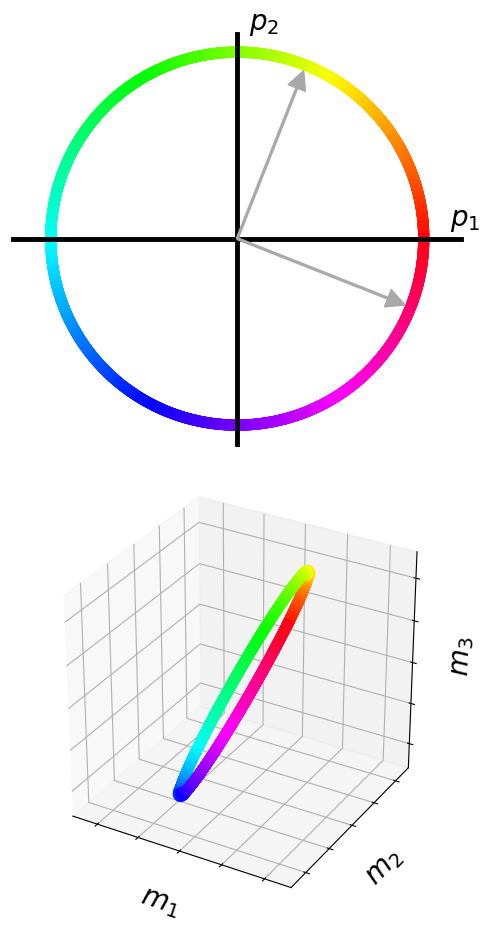

In [8]:
function plot_3d_sensor(H::Array{Float64, 2}, max_p::Float64, filename::Union{Missing, AbstractString}=missing)
    m = get_cm(2*π)
    θ = range(0.0, stop=2*π, length=500)
    p = max_p .* transpose(hcat(cos.(θ), sin.(θ)))
    
    #fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5, 8))
    fig = plt.figure(figsize=(5, 10))
    
    axs1 = plt.subplot(211, aspect="equal") 
    axes_coords = [1.01 0.58; 0.56 0.99]
    move_axes_to_origin(axs1, axes_coords)
    axs1.set_xlabel("\$p_1\$", fontsize=20)
    axs1.set_ylabel("\$p_2\$", rotation=0, fontsize=20)
    
    for i = 1:length(θ)-1
        axs1.plot([p[1,i], p[1,i+1]], [p[2,i], p[2,i+1]], lw=8, c=m.to_rgba(mean(θ[i:i+1])))
    end

    axs1.set_xlim([-1.2, 1.2])
    F = svd(H, full=true)
    svec_plot1 = F.Vt[1,:] - 0.1 * F.Vt[1,:] ./ norm.(F.Vt[1,:])
    svec_plot2 = F.Vt[2,:] - 0.1 * F.Vt[2,:] ./ norm.(F.Vt[2,:])
    axs1.arrow(0.0, 0.0, svec_plot1[1], svec_plot1[2], color="#a9a9a9", 
            head_length = 0.1, width=0.01, head_width=0.1, zorder=99)
    axs1.arrow(0.0, 0.0, svec_plot2[1], svec_plot2[2], color="#a9a9a9", 
            head_length = 0.1, width=0.01, head_width=0.1, zorder=99)

    using3D()
    axs2 = plt.subplot(212, aspect="equal", projection="3d")
    axs2.set_aspect("equal")
    axs2.set_xlabel("\$m_1\$", fontsize=20)
    axs2.set_ylabel("\$m_2\$", fontsize=20)
    axs2.set_zlabel("\$m_3\$", fontsize=20)
    axs2.set_xticklabels([])
    axs2.set_yticklabels([])
    axs2.set_zticklabels([])
    axs2.grid("on")
    
    n = H * p
    @assert size(n)[1] == 3
    
    for i=1:length(θ)-1
        axs2.plot([n[1,i], n[1,i+1]], [n[2,i], n[2,i+1]], [n[3,i], n[3,i+1]], lw=8, c=m.to_rgba(mean(θ[i:i+1])))
    end
    
    axs2.set_xlim(axs2.get_zlim())
    axs2.set_ylim(axs2.get_zlim())
    plt.subplots_adjust(top=1.0, bottom=0.0)
    #down_arrow(fig, 5.7, -.9)
    fig.tight_layout()
    if typeof(filename) != Missing
        plt.savefig(split(filename, ".")[1] * ".png", format="png", dpi=300, transparent=true)
    end
    plt.show()
end


H = [0.8 4.9; 7.8 1.1; 3.6 12.0]
plot_3d_sensor(H, 1., "three_sensor_optimal")

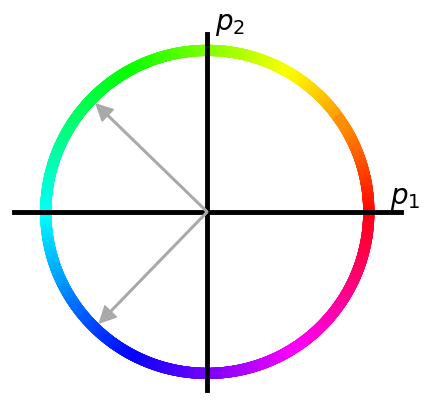

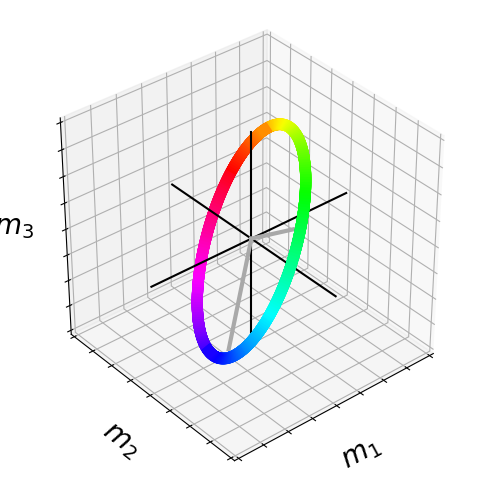

In [9]:
function plot_3d_sensor2(H::Array{Float64, 2}, max_p::Float64, filename::Union{Missing, AbstractString}=missing)
    m = get_cm(2*π)
    F = svd(H, full=true)
    theta = atan(F.Vt[2,1]/F.Vt[1,1])-π/16
    θ = range(theta, stop=theta+2*π, length=500)
    p = max_p .* transpose(hcat(cos.(θ), sin.(θ)))
    
    fig, axs1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), 
                            gridspec_kw = Dict("top" => 1.0, "bottom" => 0.0))
    #fig = plt.figure(figsize=(5, 10))
    #plt.subplots_adjust(bottom=0.0, top=1.0)

    #axs1 = plt.subplot(211, aspect="equal")
    axs1.set_aspect("equal")
    axes_coords = [1.01 0.58; 0.56 0.99]
    move_axes_to_origin(axs1, axes_coords)
    axs1.set_xlabel("\$p_1\$", fontsize=20)
    axs1.set_ylabel("\$p_2\$", rotation=0, fontsize=20)
    
    
    for i = 1:length(θ)-1
        axs1.plot([p[1,i], p[1,i+1]], [p[2,i], p[2,i+1]], lw=8, c=m.to_rgba(mean(θ[i:i+1])%(2*π)))
    end

    axs1.set_xlim([-1.2, 1.2])
    svec_plot1 = F.Vt[1,:] - 0.1 * F.Vt[1,:] ./ norm.(F.Vt[1,:])
    svec_plot2 = F.Vt[2,:] - 0.1 * F.Vt[2,:] ./ norm.(F.Vt[2,:])
    axs1.arrow(0.0, 0.0, svec_plot1[1], svec_plot1[2], color="#a9a9a9", 
            head_length = 0.1, width=0.01, head_width=0.1, zorder=99)
    axs1.arrow(0.0, 0.0, svec_plot2[1], svec_plot2[2], color="#a9a9a9", 
            head_length = 0.1, width=0.01, head_width=0.1, zorder=99)
    fig.tight_layout()
    if typeof(filename) != Missing
        plt.savefig(split(filename, ".")[1] * "_a.png", format="png", dpi=300, transparent=true)
    end
    plt.show()

    
    #using3D()
    
      
    fig, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), subplot_kw = Dict("projection"=>"3d"))
    #axs2 = plt.subplot(212, aspect="equal", projection="3d")
    
    axs2.zaxis.set_rotate_label(false)  # disable automatic rotation
    axs2.set_xlabel("\$m_1\$", fontsize=20)
    axs2.set_ylabel("\$m_2\$", fontsize=20)
    axs2.set_zlabel("\$m_3\$", fontsize=20, rotation=0)
    axs2.set_xticklabels([])
    axs2.set_yticklabels([])
    axs2.set_zticklabels([])
    axs2.grid("on")
    
    n = H * p
    @assert size(n)[1] == 3
    end_points = [-2., 2.]
    
    for i=1:length(θ)-1
        if i == 200
            axs2.plot([end_points[1], end_points[2]], [0.0, 0.0], [0.0, 0.0], c="k", zorder=99)
            axs2.plot([0.0, 0.0], [end_points[1], end_points[2]], [0.0, 0.0], c="k", zorder=99)
            axs2.plot([0.0, 0.0], [0.0, 0.0], [end_points[1], end_points[2]], c="k", zorder=99)
        end
        if i < 300 && i > 50
            axs2.plot([n[1,i], n[1,i+1]], [n[2,i], n[2,i+1]], [n[3,i], n[3,i+1]], lw=8, c=m.to_rgba(mean(θ[i:i+1])%(2*π)), zorder=999)
        else
            axs2.plot([n[1,i], n[1,i+1]], [n[2,i], n[2,i+1]], [n[3,i], n[3,i+1]], lw=8, c=m.to_rgba(mean(θ[i:i+1])%(2*π)))
        end
    end
    svec_plot1 = (F.S[1]*F.U[:,1] - 0.15 * F.S[1]*F.U[:,1] / F.S[1])
    svec_plot2 = (F.S[2]*F.U[:,2] - 0.15 * F.S[2]*F.U[:,2] / F.S[2])
    svec_plot3 = 1e-9*F.U[:,3]
        
    axs2.plot([0.0, svec_plot1[1]], [0.0, svec_plot1[2]], [0.0, svec_plot1[3]], color="#a9a9a9", lw=3, zorder=900)
    axs2.plot([0.0, svec_plot2[1]], [0.0, svec_plot2[2]], [0.0, svec_plot2[3]], color="#a9a9a9", lw=3, zorder=100)
    axs2.plot([0.0, svec_plot3[1]], [0.0, svec_plot3[2]], [0.0, svec_plot3[3]], color="#a9a9a9")
    
    
    axs2.set_xlim(axs2.get_zlim())
    axs2.set_ylim(axs2.get_zlim())
    axs2.view_init(elev=axs2.elev+5, azim=230)
    axs2.dist=10
        
    #down_arrow(fig, 5.7, -.9)
    fig.tight_layout()
    if typeof(filename) != Missing
        plt.savefig(split(filename, ".")[1] * "_b.png", format="png", dpi=300, transparent=true)
    end
    plt.show()
end


H = [0.8 1.3; 1.4 0.3; 0.3 1.0]
plot_3d_sensor2(H, 1., "three_sensor_optimal")